# Compare to Hydrography
## Overview

1. load GLODAP gridded climatologies for various hydrographic data
2. find closest value to each ForCenS sample point in space
3. plot and compare!


In [1]:
# preamble# Preamble
import numpy as np
import pandas as pd
import xarray as xr
import cartopy as ctpy
import matplotlib.pyplot as plt


In [7]:
# load data
T = xr.open_dataset('../data/GLODAPv2.2016b.temperature.nc')
S = xr.open_dataset('../data/GLODAPv2.2016b.salinity.nc')
Si = xr.open_dataset('../data/GLODAPv2.2016b.silicate.nc')
O = xr.open_dataset('../data/GLODAPv2.2016b.oxygen.nc')
CO2 = xr.open_dataset('../data/GLODAPv2.2016b.TCO2.nc')

# load forcens data
df = pd.read_csv('../data/ForCenS_cleaned.csv')
df.head()

,Sample,Sample_ID,Flag,Device,Latitude,Longitude,Water_depth,Ocean,Sample_depth_top,Sample_depth_bottom,...,Globorotalia_menardii_&_Globorotalia_tumida,Globigerinoides_ruber_&_Globigerinoides_white,Turborotalita_humilis_&_Berggrenia_pumilio,Globorotalia_truncatulinoides_dextral_coiling,Globorotalia_truncatulinoides_sinistral_coiling,Trilobatus_sacculifer_w_sac_chamber,Trilobatus_sacculifer_wo_sac_chamber,Turborotalita_quinqueloba_dextral_coiling,Turborotalita_quinqueloba_sinistral_coiling,unidentified
0,A15-559F,CLIMAP_0001,1,Piston,8.9830,51.7330,3797.0,129.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.019074,NaN,NaN,0.032698
1,A152-84,CLIMAP_0002,0,Piston,44.3498,-30.2670,2750.0,7.0,NaN,NaN,...,NaN,NaN,NaN,0.020576,0.014403,0.004115,0.000000,NaN,NaN,0.041152
2,A157-3,CLIMAP_0004,0,Piston,50.9332,-41.7500,4025.0,7.0,NaN,NaN,...,NaN,NaN,NaN,0.007123,0.011396,0.000000,0.001425,NaN,NaN,0.014245
3,A164-13,CLIMAP_0005,1,Piston,35.7167,-67.3333,5103.0,7.0,0.0,0.01,...,NaN,NaN,NaN,0.006637,0.033186,0.015487,0.064159,NaN,NaN,0.035398
4,A164-15,CLIMAP_0006,0,Piston,36.1333,-68.9167,4624.0,7.0,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.029412,0.016043,0.024064,NaN,NaN,0.026738


In [8]:
T

<xarray.Dataset>
Dimensions:             (depth_surface: 33, lat: 180, lon: 360, snr: 1)
Coordinates:
  * lon                 (lon) float64 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: depth_surface, snr
Data variables:
    temperature         (depth_surface, lat, lon) float64 ...
    temperature_error   (depth_surface, lat, lon) float64 ...
    Input_mean          (depth_surface, lat, lon) float64 ...
    Input_std           (depth_surface, lat, lon) float64 ...
    Input_N             (depth_surface, lat, lon) float64 ...
    temperature_relerr  (depth_surface, lat, lon) float64 ...
    SnR                 (snr) float64 ...
    CL                  (snr) float64 ...
    Depth               (depth_surface) float64 ...
Attributes:
    Description:          1 X 1 global mapped field of temperature from the G...
    Created:              Created by Siv K. Lauvset on 12-May-2016 18:47:05
    Institution name:     University of Bergen
    Contact information:  siv.lauvset@uib.no; are.olsen@uib.no
    Citation:             Cite as: Lauvset, Siv K., Key, Robert M., Olsen, Ar...
    Comment:              Ttza2hhod0eend0s ai2eLlt  a iufucosivonilsr,neer gs...

In [54]:
def find_point(lat_in,lon_in):
    
    # convert lons
    if 0<lon_in<20:
        lon_in+= 360
        
    if 0>lon_in:
        lon_in = lon_in+360

    
    T_point = T.sel(lon=lon_in, lat=lat_in, method='nearest')
    S_point = S.sel(lon=lon_in, lat=lat_in, method='nearest')
    Si_point = Si.sel(lon=lon_in, lat=lat_in, method='nearest')
    O_point = O.sel(lon=lon_in, lat=lat_in, method='nearest')
    CO2_point = CO2.sel(lon=lon_in, lat=lat_in, method='nearest')
    
    return T_point,S_point,Si_point,O_point,CO2_point

    

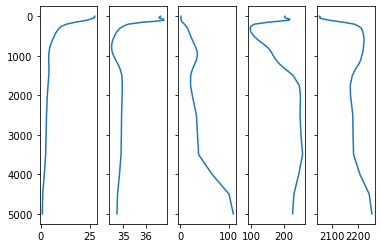

In [73]:
T_point,S_point,Si_point,O_point,CO2_point = find_point(-10,-25)

f,a = plt.subplots(1,5,sharey=True)
a[0].plot(T_point['temperature'],T_point['Depth'])
a[1].plot(S_point['salinity'],T_point['Depth'])
a[2].plot(Si_point['silicate'],T_point['Depth'])
a[3].plot(O_point['oxygen'],T_point['Depth'])
a[4].plot(CO2_point['TCO2'],T_point['Depth'])

for ax in a:
    ax.invert_yaxis()


In [165]:
T_surface = []
T_400 = []
S_surface = []
Si_surface = []
for index, row in df.iterrows():
    
    T_point,S_point,Si_point,O_point,CO2_point = find_point(row['Latitude'],row['Longitude'])
    
    T_surface.append(T_point['temperature'].sel(depth_surface=0).values.item())
    T_400.append(T_point['temperature'].sel(depth_surface=12).values.item())
    S_surface.append(S_point['salinity'].sel(depth_surface=0).values.item())
    Si_surface.append(Si_point['silicate'].sel(depth_surface=0).values.item())


df['T_surface'] = pd.Series(T_surface,index=df.index,name='T_surface')
df['T_400'] = pd.Series(T_400,index=df.index,name='T_400')


<AxesSubplot:xlabel='Latitude', ylabel='Globorotalia_truncatulinoides_sinistral_coiling'>

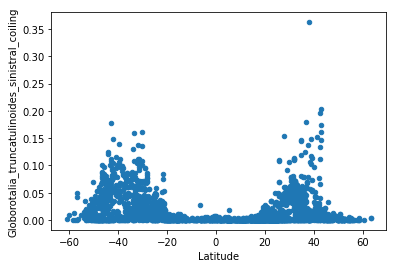

In [171]:
df.plot.scatter(x='Latitude',y='Globorotalia_truncatulinoides_sinistral_coiling')

In [157]:
T_point['Depth'].sel(depth_surface=12)

<xarray.DataArray 'Depth' ()>
array(400.)
Coordinates:
    lon      float64 47.5
    lat      float64 12.5
Attributes:
    units:     m
    positive:  down